# Crop yield Prediction

### Import necessary libraries

-->NumPy stands for ‘Numerical Python’ or ‘Numeric Python’. It is an open source module of Python which provides fast mathematical computation on arrays and matrices.

->Similar to NumPy, Pandas is one of the most widely used python libraries in data science. It provides high-performance, easy to use structures and data analysis tools. Unlike NumPy library which provides objects for multi-dimensional arrays, Pandas provides in-memory 2d table object called Dataframe. It is like a spreadsheet with column names and row labels.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

-->NumPy stands for ‘Numerical Python’ or ‘Numeric Python’. It is an open source module of Python which provides fast mathematical computation on arrays and matrices.

->Similar to NumPy, Pandas is one of the most widely used python libraries in data science. It provides high-performance, easy to use structures and data analysis tools. Unlike NumPy library which provides objects for multi-dimensional arrays, Pandas provides in-memory 2d table object called Dataframe. It is like a spreadsheet with column names and row labels.

### load the dataset

In [2]:
data = pd.read_excel('crop_csv_file_price.xlsx')

In [3]:
#length of the dataset
len(data)

49999

In [4]:
#shape of the dataset
data.shape

(49999, 6)

In [5]:
#print the data
data

,State_Name,District_Name,Crop_Year,Season,Crop,Cost
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,323.403814
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,144.471121
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,132.774265
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37.536242
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,409.000000
...,...,...,...,...,...,...
49994,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Small millets,145.761388
49995,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Soyabean,155.604815
49996,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Sunflower,132.959419
49997,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Urad,128.151247


# Data Visulization

<AxesSubplot:xlabel='Crop_Year', ylabel='Cost'>

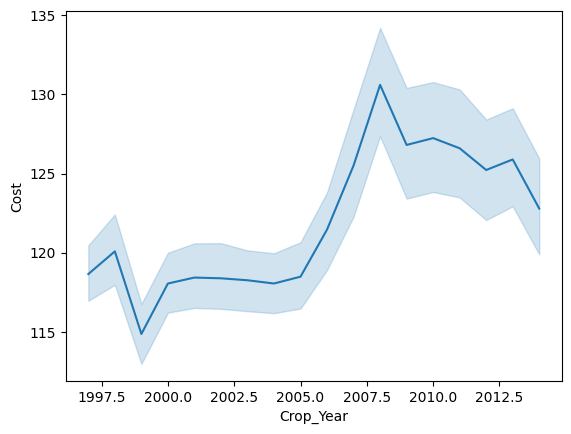

In [8]:
#plot a graph for crop_yearand Production
sns.lineplot(x=data["Crop_Year"],y=data["Cost"])

<AxesSubplot:xlabel='Season', ylabel='Cost'>

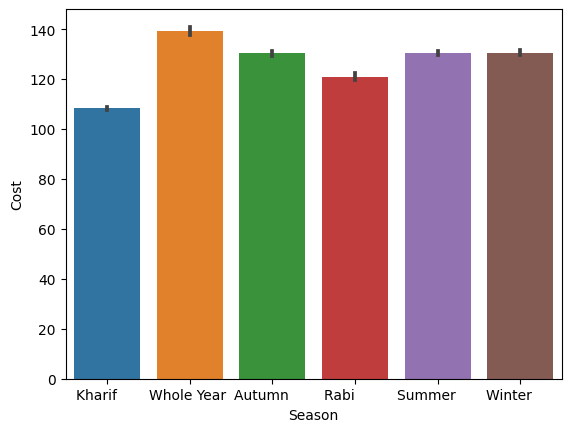

In [11]:
#plot for the seasonal production
sns.barplot(x=data["Season"],y=data["Cost"])

In [12]:
#data grouped by season for Productions
data.groupby("Season",axis=0).agg({"Cost":np.sum})

,Cost
Season,
Autumn,1.861053e+05
Kharif,1.842541e+06
Rabi,1.894645e+06
Summer,2.752776e+05
Whole Year,1.759929e+06
Winter,1.473583e+05


In [13]:
#unique crop value counts
data["Crop"].value_counts()

Rice                 3853
Maize                3249
Moong(Green Gram)    2084
Dry chillies         1595
Arhar/Tur            1578
                     ... 
Grapes                 17
Varagu                 13
Peas  (vegetable)       3
other fibres            2
Guar seed               1
Name: Crop, Length: 80, dtype: int64

### Data Exploration

Dataset comprises of 49999 observations and 10 characteristics. Out of which one is dependent variable and rest 9 are independent variables — physico-chemical characteristics. It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     49999 non-null  object 
 1   District_Name  49999 non-null  object 
 2   Crop_Year      49999 non-null  int64  
 3   Season         49999 non-null  object 
 4   Crop           49999 non-null  object 
 5   Cost           49999 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.3+ MB


In [17]:
#handling missing data
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     49999 non-null  object 
 1   District_Name  49999 non-null  object 
 2   Crop_Year      49999 non-null  int64  
 3   Season         49999 non-null  object 
 4   Crop           49999 non-null  object 
 5   Cost           49999 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.7+ MB


Data has only float and integer values. No variable column has null/missing values. The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [18]:
data.describe()

,Crop_Year,Cost
count,49999.000000,49999.000000
mean,2005.879138,122.119584
std,5.106092,73.705895
min,1997.000000,0.000000
25%,2002.000000,103.395872
50%,2006.000000,122.673265
75%,2010.000000,142.604225
max,2014.000000,1100.000000


# Categorical data handling

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

State_Name = le.fit_transform(data.State_Name)
District_Name = le.fit_transform(data.District_Name)
#Crop_Year = le.fit_transform(data.Crop_Year)
crop = le.fit_transform(data.Crop)
Season = le.fit_transform(data.Season)
data['State_Name'] = State_Name
data['District_Name'] = District_Name
data['Crop'] = crop
data['Season']  = Season

In [20]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Cost
0,0,78,2000,1,0,323.403814
1,0,78,2000,1,46,144.471121
2,0,78,2000,1,59,132.774265
3,0,78,2000,4,3,37.536242
4,0,78,2000,4,12,409.000000
...,...,...,...,...,...,...
49994,6,46,2006,1,65,145.761388
49995,6,46,2006,1,66,155.604815
49996,6,46,2006,1,68,132.959419
49997,6,46,2006,1,74,128.151247


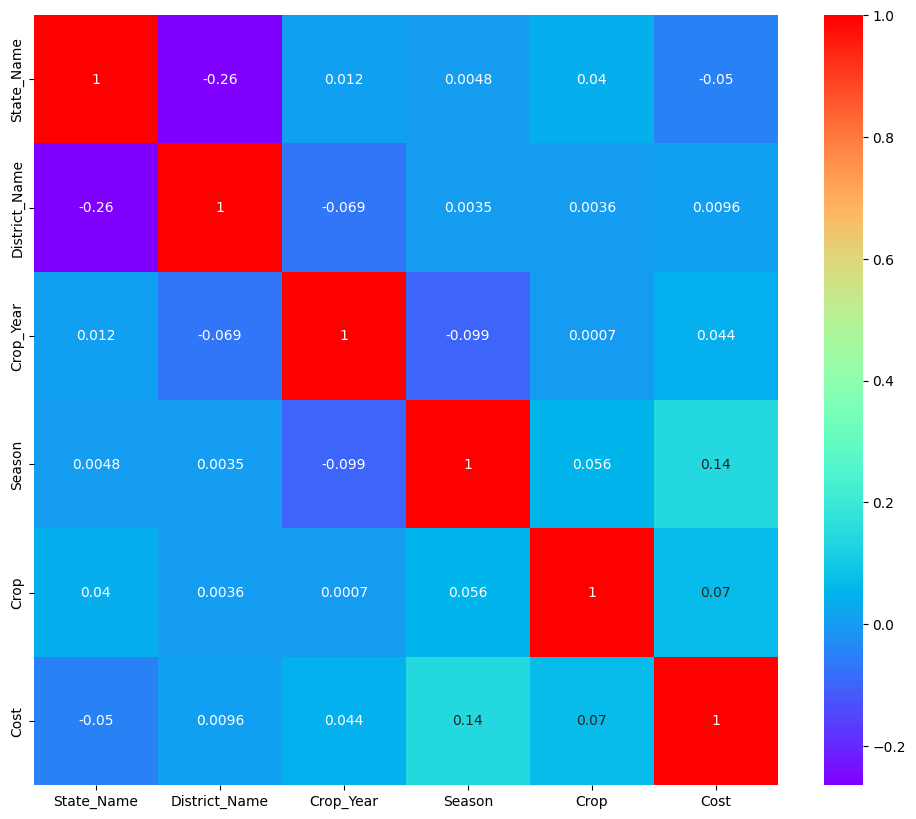

In [21]:
corr = data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='rainbow')
plt.show()

In [22]:
data['State_Name'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [23]:
data['District_Name'].unique()

array([ 78,  79,  96,   0,  24,  35,  43,  49,  59,  60,  83,  97,  98,
       107, 108, 109,   1,  22,  31,  36,  37,  61,  64,  65,  66,  67,
        76,  80, 100, 102, 104, 105, 110, 111,   5,  10,  18,  20,  23,
        27,  29,  30,  32,  33,  40,  41,  44,  48,  51,  52,  53,  54,
        58,  62,  70,  73,  75,  93,  95, 101, 103,   2,   3,   4,   9,
        12,  14,  15,  19,  26,  39,  42,  45,  47,  50,  55,  56,  57,
        63,  68,  69,  71,  72,  74,  77,  81,  82,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  94,  99, 106,  21,   6,   7,   8,  11,
        13,  16,  17,  25,  28,  34,  38,  46])

In [24]:
data['Season'].unique()

array([1, 4, 0, 2, 3, 5])

In [25]:
data['Crop'].unique()

array([ 0, 46, 59,  3, 12, 15, 21, 67, 69, 70,  7, 20, 79, 73, 35, 39, 74,
        1, 26, 68,  2, 13, 17, 28, 29, 32, 57, 71, 24, 76, 37, 64, 34, 60,
       42, 78, 61, 65, 16, 55, 44, 66,  5,  6, 10, 14, 19, 25, 36, 43, 77,
       45, 47, 49, 53, 72, 58, 38, 18, 33, 54, 63, 11, 50, 40,  9, 62, 75,
       22, 23, 41, 56, 30, 51,  8, 48, 52,  4, 31, 27])

# Splitting the dataset for train and test

In [26]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

In [27]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=100)

# Apply algorithm to fit model

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, Y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, y_train_pred),
        mean_squared_error(Y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, y_train_pred),
        r2_score(Y_test, y_test_pred)))



c:\users\hitgeet\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


MSE train: 57.386, test: 400.081
R^2 train: 0.989, test: 0.929


In [33]:
print(forest.score(X_test,Y_test))

0.9290128523010895


In [35]:
score_rf=forest.score(X_test,Y_test)

In [36]:
score_rf=forest.score(X_train,Y_train)

In [37]:
score_rf

0.9893365275765573

In [38]:
forest.predict(X_test)

array([123.83476971,  79.684     ,  93.242     , ..., 140.317     ,
        28.667     , 134.52091383])

In [39]:
import pickle
with open('rf.pkl', 'wb') as file:
   pickle.dump(forest, file)

# Model2 

In [40]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [41]:
Y_pred_regressor = regressor.predict(X_test)

In [42]:
score_dt=regressor.score(X_train, Y_train)

In [43]:
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, y_train_pred),
        mean_squared_error(Y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, y_train_pred),
        r2_score(Y_test, y_test_pred)))

MSE train: 0.000, test: 705.097
R^2 train: 1.000, test: 0.875


In [44]:
import pickle
with open('decision.pkl', 'wb') as file:
   pickle.dump(regressor, file)

In [45]:
scores = [score_rf,score_dt]
algorithems = ['random forest','Decisiontree']

for i in range(len(algorithems)):
    print('the accuracy score achieved using' +algorithems[i]+ 'is :'+str(scores[i])+" %")

the accuracy score achieved usingrandom forestis :0.9893365275765573 %
the accuracy score achieved usingDecisiontreeis :1.0 %


TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

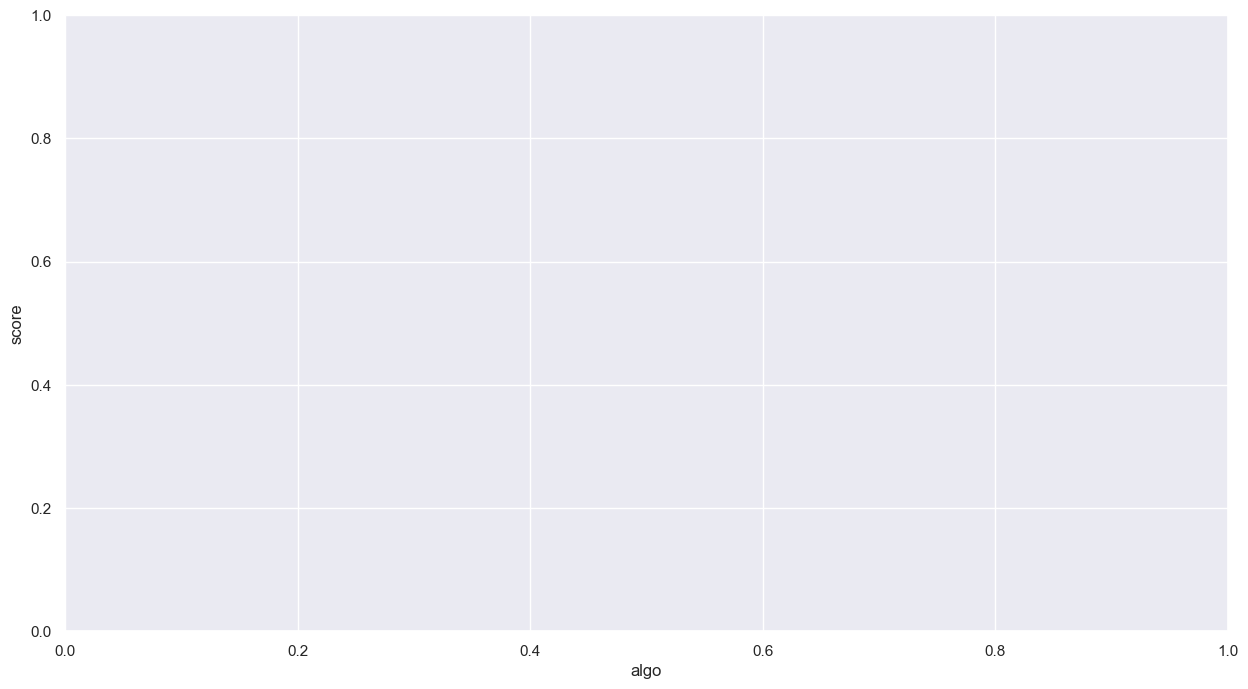

In [46]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel('algo')
plt.ylabel('score')
sns.barplot(algorithems,scores)

In [ ]:
state = input('enter State:--->')
district = input('enter District:--->')
year = input('enter Year:--->')
season = input('enter Season:--->')
crop = input('enter Crop:--->')
Temperature = input('enter Temperature:--->')
humidity= input('enter Humidity:--->')
soilmoisture= input('enter Soilmoisture:---->')
area = input('enter area(in Hectares):--->')

out_1 = forest.predict([[float(state),
       float(district),
       float(year),
       float(season),
       float(crop),
       float(Temperature),
       float(humidity),
       float(soilmoisture),
       float(area)]])
print(out_1)
print('crop yield Production(in Tones):',out_1)


# GUI

In [47]:
from tkinter import *
from tkinter import ttk

root = Tk()
root.title('Crop Yield Prediction')
root.geometry('850x650')
root.configure(background="green")
var = StringVar()
label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="green")
var.set('Crop Yield Prediction')
label.grid(row=0,columnspan=6)



label_1 = ttk.Label(root, text ='State',font=("Helvetica", 16),background="green")
label_1.grid(row=11,column=0)
    
Entry_1= Entry(root)
Entry_1.grid(row=11,column=1)

label_2 = ttk.Label(root, text ='District',font=("Helvetica", 16),background="green")
label_2.grid(row=12,column=0)
    
Entry_2 = Entry(root)
Entry_2.grid(row=12,column=1)
    
    
label_3 = ttk.Label(root, text ='Year',font=("Helvetica", 16),background="green")
label_3.grid(row=13,column=0)
    
Entry_3 = Entry(root)
Entry_3.grid(row=13,column=1)

label_4 = ttk.Label(root, text ='Season',font=("Helvetica", 16),background="green")
label_4.grid(row=14,column=0)
    
Entry_4= Entry(root)
Entry_4.grid(row=14,column=1)

label_5 = ttk.Label(root, text ='Crop',font=("Helvetica", 16),background="green")
label_5.grid(row=15,column=0)
    
Entry_5 = Entry(root)
Entry_5.grid(row=15,column=1)
    
    
label_6 = ttk.Label(root, text ='Temperature',font=("Helvetica", 16),background="green")
label_6.grid(row=16,column=0)
    
Entry_6 = Entry(root)
Entry_6.grid(row=16,column=1)

label_7 = ttk.Label(root, text ='Humidity',font=("Helvetica", 16),background="green")
label_7.grid(row=17,column=0)
    
Entry_7= Entry(root)
Entry_7.grid(row=17,column=1)

label_8 = ttk.Label(root, text ='Soilmoisture',font=("Helvetica", 16),background="green")
label_8.grid(row=18,column=0)

Entry_8 = Entry(root)
Entry_8.grid(row=18,column=1)
    
    
label_9 = ttk.Label(root, text ='Area(in Hectares)',font=("Helvetica", 16),background="green")
label_9.grid(row=19,column=0)
    
Entry_9 = Entry(root)
Entry_9.grid(row=19,column=1)


def predict():
    state = Entry_1.get()
    district = Entry_2.get()
    year = Entry_3.get()
    season = Entry_4.get()
    crop = Entry_5.get()
    Temperature = Entry_6.get()
    humidity = Entry_7.get()
    soilmoisture = Entry_8.get()
    area = Entry_9.get()
    out = forest.predict([[float(state),
       float(district),
       float(year),
       float(season),
       float(crop),
       float(Temperature),
       float(humidity),
       float(soilmoisture),
       float(area)]])
    
    output.delete(0,END)
    output.insert(0,out[0])
   
   

b1 = Button(root, text = 'Production(in Tones)',font=("Helvetica", 16),background="gray",command = predict)
b1.grid(row=20,column=0)
    


output = Entry(root)
output.grid(row=20,column=1)
    
root.mainloop()